# Question 1:  Is there a correlation between budget and Revenue?

### Findings:
With a correlation coefficient of 0.75, there is a strong relationship between budget and revenue. It is also interesting to note that this relationship has strengthened throughout the last 4 decades. Going from 0.36 in 1980s to 0.90 in the 2010s!!

### Reccomendations:
Given this information, it is clear that the key is to spend spend spend when it comes to revenue generation, up to a point, where diminishing returns are likely to be seen

# Import Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../cleandata/movierevenue.csv',index_col = 0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747


In [4]:
corr = df.corr()['production_budget']['worldwide_gross']

print(f" The Correlation Coefficient between Production budget and world wide gross is: {corr}")
# Can see that budget and worldwide gross are relatively highly correlated

 The Correlation Coefficient between Production budget and world wide gross is: 0.7483059765694665


Checking distribution of the data

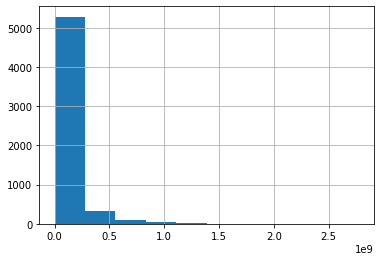

In [5]:
df['worldwide_gross'].hist()

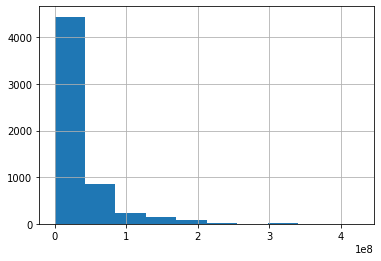

In [6]:
df['production_budget'].hist()

# Investigating How to graph the relationship

Text(0, 0.5, 'Worldwide Gross in Billions of USD')

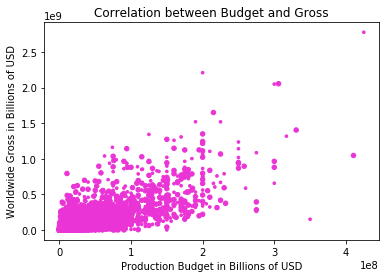

In [7]:
plt.scatter(x = 'production_budget', y = 'worldwide_gross', data= df, marker = 'o', color = "#eb34d5",s = (7,20))
plt.title('Correlation between Budget and Gross')
plt.xticks()
plt.xlabel('Production Budget in Billions of USD')
plt.ylabel('Worldwide Gross in Billions of USD')

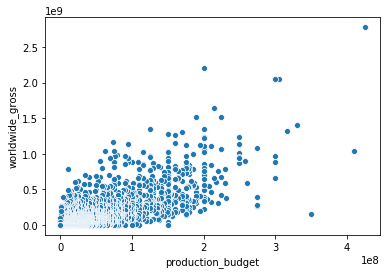

In [8]:
sns.scatterplot(x = 'production_budget', y='worldwide_gross', data = df)

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

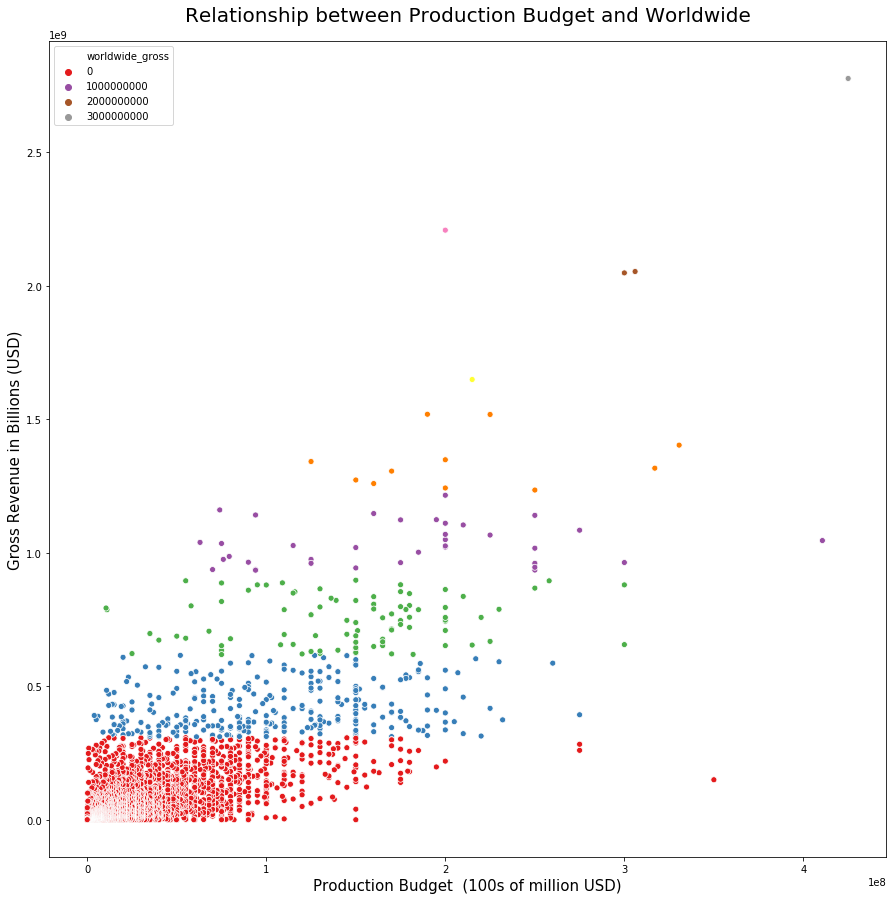

In [9]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="production_budget", y="worldwide_gross",hue = "worldwide_gross",
                     data=df, palette="Set1")


ax.set_title("Relationship between Production Budget and Worldwide", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

# Graph showing correlation coefficient and regression

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

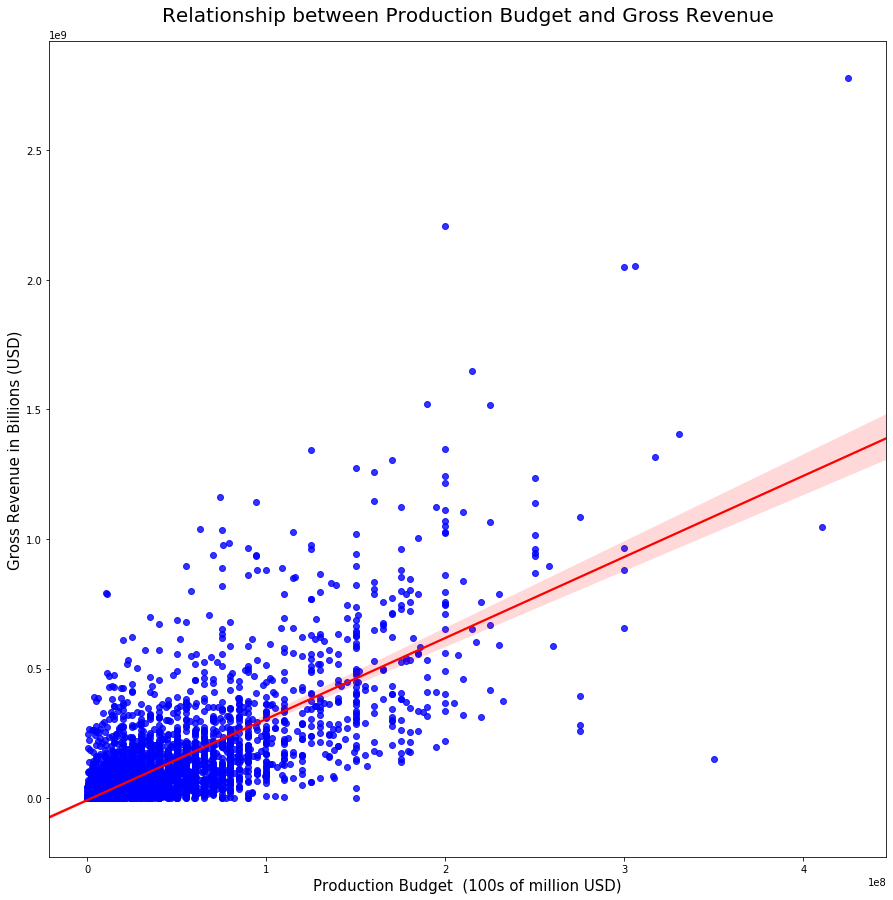

In [10]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.regplot(x="production_budget", y="worldwide_gross",data=df, 
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})


ax.set_title("Relationship between Production Budget and Gross Revenue", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

**After looking through the data, I found that some movie's had the same name - to avoid the different movies being included when grouping by movie name I will create a new column that combines movie name and release data**

In [553]:
df['movie_check'] = df['movie']+' '+df['release_date']

# Creating DataFrames for each decade I will analyse

In [36]:
df2010 = df.loc[(df['year_released'] >= 2010)]

In [37]:
df2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,4,12,5.710167,0.850972,1747311220


In [38]:
df2010['year_released'].value_counts()

2015    338
2010    274
2014    255
2011    254
2013    238
2012    235
2016    219
2017    168
2018    143
2019     67
2020      3
Name: year_released, dtype: int64

In [39]:
df2000= df.loc[(df['year_released'] < 2010) & (df['year_released'] >= 2000)]

In [40]:
df2000.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,4,12,5.532577,0.846921,2351345279
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007,13,1,Thursday,3,5,2.211401,0.688609,663420425
15,16,2007-05-04,Spider-Man 3,258000000,336530303,894860230,2007,13,1,Friday,4,5,2.468451,0.711687,636860230
19,20,2009-07-15,Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,2009,11,1,Wednesday,2,7,2.740855,0.732681,685213767
23,24,2006-06-28,Superman Returns,232000000,200120000,374085065,2006,14,1,Wednesday,2,6,0.612436,0.379820,142085065


In [41]:
df2000['year_released'].value_counts()

2008    264
2006    260
2009    239
2005    223
2007    220
2002    210
2004    206
2003    201
2000    189
2001    181
Name: year_released, dtype: int64

In [42]:
df1990 = df.loc[(df['year_released'] < 2000) & (df['year_released'] >= 1990)]

In [43]:
df1990.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,4,12,10.041042,0.909429,2008208395
106,7,1999-06-30,Wild Wild West,175000000,113805681,221229335,1999,21,2,Wednesday,2,6,0.264168,0.208966,46229335
109,10,1995-07-28,Waterworld,175000000,88246220,264246220,1995,25,2,Friday,4,7,0.509978,0.337739,89246220
199,100,1999-06-16,Tarzan,145000000,171091819,448191819,1999,21,2,Wednesday,2,6,2.090978,0.676478,303191819
207,8,1998-07-01,Armageddon,140000000,201578182,554600000,1998,22,2,Wednesday,2,7,2.961429,0.747566,414600000


In [44]:
df1990['year_released'].value_counts()

1999    181
1998    151
1996    104
1997    102
1995     75
1994     56
1993     49
1991     39
1992     36
1990     30
Name: year_released, dtype: int64

In [47]:
df1980 = df.loc[(df['year_released'] < 1990) & (df['year_released'] >= 1980)]

In [48]:
df1980.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
695,96,1988-06-22,Who Framed Roger Rabbit?,70000000,154112492,351500000,1988,32,3,Wednesday,2,6,4.021429,0.800853,281500000
722,23,1989-08-09,The Abyss,70000000,54243125,54243125,1989,31,3,Wednesday,2,8,-0.225098,-0.290486,-15756875
958,59,1988-05-25,Rambo III,58000000,53715611,188715611,1988,32,3,Wednesday,2,5,2.253717,0.692659,130715611
1011,12,1989-12-22,Tango & Cash,55000000,63408614,63408614,1989,31,3,Friday,4,12,0.152884,0.132610,8408614
1048,49,1981-06-19,Superman II,54000000,108185706,108185706,1981,39,3,Friday,4,6,1.003439,0.500858,54185706


In [49]:
df1980['year_released'].value_counts()

1987    35
1986    33
1989    32
1988    31
1982    30
1981    30
1985    29
1980    29
1984    28
1983    24
Name: year_released, dtype: int64

In [50]:
# Checking Correlation

In [52]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.33908941641032925
Correlation in 1990s is: 0.557726635057715
Correlation in 2000s is: 0.7508428170532472
Correlation in 2010s is: 0.7936375869164447


In [53]:
# Saving DFs

In [54]:
%store df1980
%store df1990
%store df2000
%store df2010

Stored 'df1980' (DataFrame)
Stored 'df1990' (DataFrame)
Stored 'df2000' (DataFrame)
Stored 'df2010' (DataFrame)


It is clear to see the trend in the correlation between worldwide gross and production budget has become more prominant over the past 4 decades





In [55]:
df.corr()['worldwide_gross']['production_budget']

0.7483059765694665

# Different Scatter Plot's to represent the correlation

## Regression plot

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

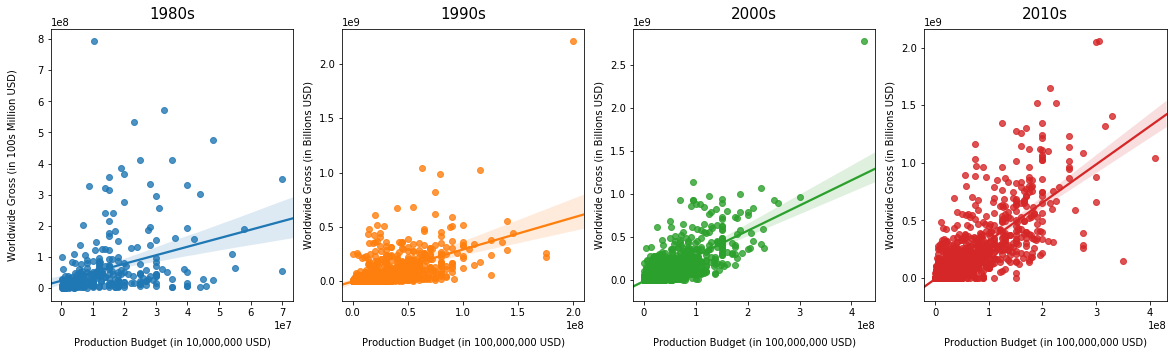

In [56]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4)

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)


In [57]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.33908941641032925
Correlation in 1990s is: 0.557726635057715
Correlation in 2000s is: 0.7508428170532472
Correlation in 2010s is: 0.7936375869164447


## Scatter Plot

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

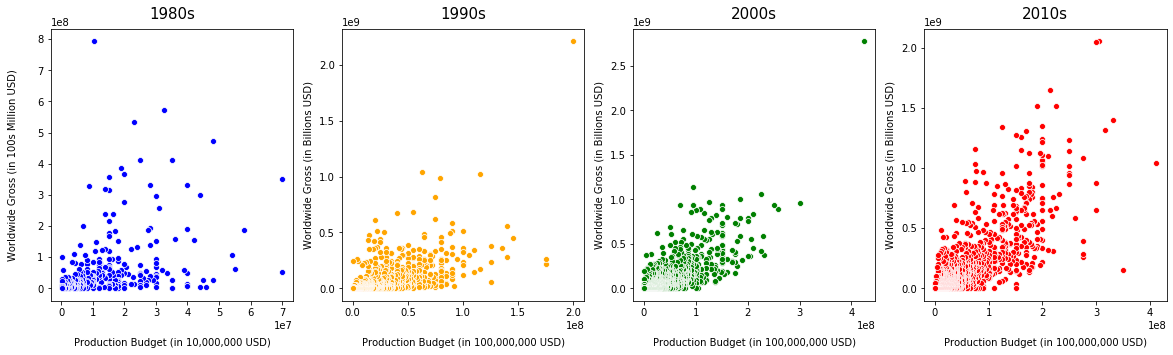

In [58]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1,color = 'blue')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2, color = 'orange')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3, color = 'green')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4, color = 'red')

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
